<a href="https://colab.research.google.com/github/yuliyaosipava/SARIMA-GARCH/blob/main/ARIMA%2BGarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OLA_ind9.xlsx to OLA_ind9.xlsx


In [ ]:
# Загрузка данных

data = pd.read_excel('OLA_ind9.xlsx')
print(data.columns)

# Преобразование столбца дат в формат datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Фильтрация данных с 2016 года
data = data.loc[data['Date'] <= '2023-01']

# Установка столбца даты в качестве индекса
data.set_index('Date', inplace=True)

# Ваши данные серии
series = data['series1']

Index(['Date', 'series1'], dtype='object')


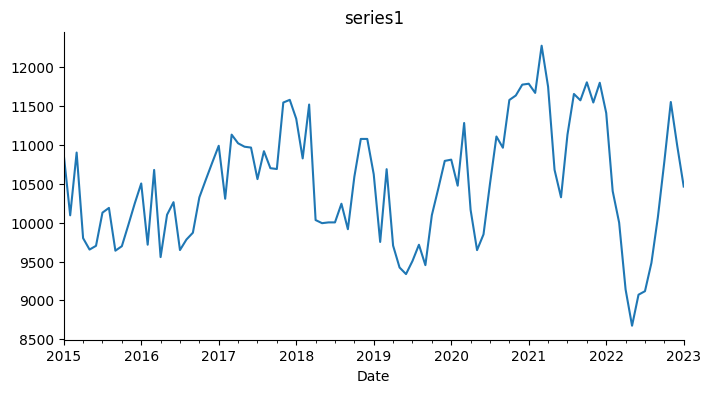

In [ ]:
# @title series1

from matplotlib import pyplot as plt
data['series1'].plot(kind='line', figsize=(8, 4), title='series1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Install the library if necessary
!pip install pmdarima

In [ ]:
# Import the library
from pmdarima.arima import auto_arima

# Build and fit the AutoARIMA model
model = auto_arima(series,
                   seasonal=True,
                   m=12,
                   suppress_warnings=True)
model.fit(series)

# Check the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

KeyboardInterrupt: 

In [ ]:
# load pmdarima
import pmdarima
#automatically fit the optimal ARIMA model for given time series
arima_model_fitted = pmdarima.auto_arima(series.iloc[2016:])
# one-step out-of sample forecast
forecast = arima_model.predict(n_periods=1)[0]

# load statsmodels
import statsmodels.tsa.arima_model stm
# fit ARIMA model
model = stm.ARIMA(X, order=(3,1,2))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 9.9 MB/s eta 0:00:00


Index(['Date', 'series1'], dtype='object')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              series1   No. Observations:                   97
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -715.589
Date:                              Mon, 10 Feb 2025   AIC                           1437.178
Time:                                      17:54:01   BIC                           1444.871
Sample:                                  01-01-2015   HQIC                          1440.287
                                       - 01-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8645      0.058     14.825      0.000       0.750       0.979
ma.S.L12      -0.50

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.389e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


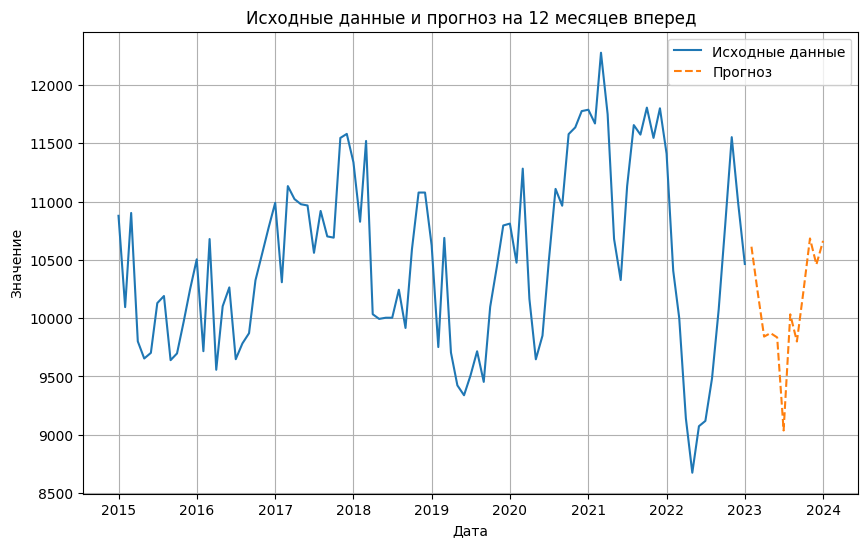

In [ ]:
import pandas as pd
import numpy as np
import pmdarima
import arch
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Чтение данных
data = pd.read_excel('OLA_ind9.xlsx')
print(data.columns)

# Преобразование столбца дат
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

# Сохранение данных за 2024 год для оценки точности модели
data_2024 = data.loc[data['Date'].dt.year == 2024]

# Фильтрация данных до января 2023 года
data = data.loc[data['Date'] <= '2023-01']
data.set_index('Date', inplace=True)
series = data['series1']

# Построение модели SARIMA
sarima_model = SARIMAX(series, order=(0, 1, 0), seasonal_order=(1, 0, 1, 12))
sarima_model_fitted = sarima_model.fit(disp=False)
print(sarima_model_fitted.summary())

# Получение остатков SARIMA
sarima_residuals = sarima_model_fitted.resid
print(sarima_residuals)

# Подгонка модели GARCH(1,1) на остатках SARIMA
garch = arch.arch_model(sarima_residuals, vol='Garch', p=1, q=1, mean='Zero')
garch_fitted = garch.fit()

# Прогноз SARIMA на 12 месяцев вперед
sarima_forecast = sarima_model_fitted.get_forecast(steps=12)
predicted_mu = sarima_forecast.predicted_mean

# Прогноз дисперсии из модели GARCH на 12 месяцев вперед
garch_forecast = garch_fitted.forecast(horizon=12)
forecast_variances = garch_forecast.variance.values[-1, :]

# Симуляция остатков с использованием прогнозируемой дисперсии
np.random.seed(0)  # Для воспроизводимости
simulated_residuals = np.random.normal(loc=0, scale=np.sqrt(forecast_variances))

# Комбинация предсказаний SARIMA и смоделированных остатков GARCH
predictions = predicted_mu + simulated_residuals

# Получение данных за 2024 год для оценки точности модели
true_values = data_2024['series1'].values

# Расчет оценок модели
mae = mean_absolute_error(true_values, predictions)
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Исходные данные')
forecast_dates = pd.date_range(start=series.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
plt.plot(forecast_dates, predictions, label='Прогноз', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Исходные данные и прогноз на 12 месяцев вперед')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Список моделей и их параметров
models = [
    {'order': (0,1,0), 'seasonal_order': (1,0,0,12), 'data': (series), 'description': 'SARIMA (0,1,0)(1,0,0,12)'}
]

# Словарь для хранения результатов
results_dict = {}

for idx, model_params in enumerate(models):
    print(f"\nМодель {idx+1}: {model_params['description']}")
    series = model_params['data']

    # Обучение модели
    model = SARIMAX(series,
                    order=model_params['order'],
                    seasonal_order=model_params['seasonal_order'],
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit()

    # Сохранение результатов
    results_dict[model_params['description']] = results

    # Вывод summary модели
    print(results.summary())

    # Прогнозирование
    forecast = results.get_forecast(steps=len(series))
    forecast_df = forecast.conf_int()
    forecast_df['forecast'] = forecast.predicted_mean
    forecast_df.index = test_data.index  # Обновляем индекс прогнозов, чтобы совпадал с тестовыми данными

    # Оценка модели
    mse = mean_squared_error(test_data, forecast_df['forecast'])
    mae = mean_absolute_error(test_data, forecast_df['forecast'])
    mape = mean_absolute_percentage_error(test_data, forecast_df['forecast'])

    print(f"\nОценка модели {model_params['description']}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

    # Сравнение фактических и прогнозных значений
    comparison_df = pd.DataFrame({
        'Фактические значения': test_data,
        'Прогнозные значения': forecast_df['forecast']
    })
    #print("\nСравнение фактических и прогнозных значений:")
    #print(comparison_df)

    # Построение графика
    plt.figure(figsize=(12, 5))
    plt.plot(train_data.index, train_data, label='Обучающая выборка')
    plt.plot(test_data.index, test_data, label='Тестовая выборка', color='green')
    plt.plot(forecast_df.index, forecast_df['forecast'], label='Прогноз', color='red')
    plt.fill_between(forecast_df.index,
                     forecast_df.iloc[:, 0],
                     forecast_df.iloc[:, 1],
                     color='k', alpha=0.1)
    plt.title(f"Модель {model_params['description']}")
    plt.xlabel('Дата')
    plt.ylabel('Производство пива')
    plt.legend()
    plt.grid()
    plt.show()


Модель 1: SARIMA (0,1,0)(1,0,0,12)
                                     SARIMAX Results                                      
Dep. Variable:                            series1   No. Observations:                   97
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -624.730
Date:                            Mon, 10 Feb 2025   AIC                           1253.460
Time:                                    17:48:06   BIC                           1258.322
Sample:                                01-01-2015   HQIC                          1255.414
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.6726      0.100      6.693      0.000       0.476       0.870

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


NameError: name 'test_data' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Проверка диапазона дат
print("Даты в индексе от начала до конца:")
print(series.index.min(), "до", series.index.max())

# Установка корректных start_date и end_date в соответствии с индексом
start_date = '2015-01'
end_date = '2024-12'

# Обрезка данных для периода с 2015-01-01 по 2023-12-31
series = series.loc[start_date:end_date]

# Проверка монотонности индекса
print("Индекс является монотонным:", series.index.is_monotonic_increasing)

# Параметры более простых моделей SARIMA
models = [
    {
        'order': (1, 0, 0),
        'seasonal_order': (0, 0, 1, 12),
        'description': 'SARIMA (0,1,0)(1,0,0,12)'
    },
    {
        'order': (1, 0, 0),
        'seasonal_order': (0, 0, 2, 12),
        'description': 'SARIMA (1,0,0)(1,0,0,12)'
    }
]

# Период прогнозирования
forecast_steps = 12  # Прогноз на 12 месяцев (на 2024 год)
forecast_index = pd.date_range(start='2025-01', periods=forecast_steps, freq='MS')

# Цикл по моделям
for model_params in models:
    print(f"\nМодель: {model_params['description']}")

    # Обучение модели
    try:
        model = SARIMAX(
            series,
            order=model_params['order'],
            seasonal_order=model_params['seasonal_order'],
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
    except Exception as e:
        print(f"Ошибка при обучении модели {model_params['description']}: {e}")
        continue

    # Вывод summary модели
    print(results.summary())

    # Получение смоделированных значений в исходном масштабе
    fitted_values = results.predict(start=series.index[1], end=series.index[-1], typ='levels')

    # Прогнозирование на 2024 год
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    forecast_conf_int.index = forecast_index
    forecast_values.index = forecast_index

    # Построение графика
    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series, label='Исходный ряд', color='blue')
    plt.plot(fitted_values.index, fitted_values, label='Смоделированный ряд', color='red', linestyle='--')
    plt.plot(forecast_values.index, forecast_values, label='Прогноз', color='green', linestyle='--')
    plt.fill_between(forecast_conf_int.index,
                     forecast_conf_int.iloc[:, 0],
                     forecast_conf_int.iloc[:, 1],
                     color='k', alpha=0.1, label='Доверительный интервал')
    plt.xlabel('Дата')
    plt.ylabel('Значения')
    plt.title(f"Модель: {model_params['description']}")
    plt.yticks(np.arange(10000, 16001, 2000))  # Изменение шкалы по оси y
    plt.legend()
    plt.grid(True)
    plt.show()

    # Вывод прогнозных значений
    print("Прогнозные значения на 2024 год:")
    forecast_df = pd.DataFrame({
        'Прогноз': forecast_values,
        'Нижний доверительный интервал': forecast_conf_int.iloc[:, 0],
        'Верхний доверительный интервал': forecast_conf_int.iloc[:, 1]
    }, index=forecast_index)
    print(forecast_df)

    # Сохранение прогнозных значений в Excel (опционально)
    forecast_df.to_excel(f"Forecast_{model_params['description']}.xlsx")
    print(f"Прогноз сохранен в файл 'Forecast_{model_params['description']}.xlsx'")